In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Import the raw data set into a Pandas DataFrame.

In [7]:
cars = pd.read_csv('cars93.csv')

Clean the data and remove missing values. Drop any column that is not categorical or numeric. 

In [8]:
cars = cars.drop(columns='Unnamed: 0')

In [9]:
cars.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [10]:
cars=cars.dropna()

cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [11]:
cars['Cylinders']=cars['Cylinders'].astype(int)
cars['Cylinders']

0     4
1     6
2     6
3     6
4     4
     ..
87    4
89    4
90    6
91    4
92    5
Name: Cylinders, Length: 82, dtype: int32

Let our target variable be MPG.highway again. Separate the independent variables from the dependent variable.

In [12]:
X = cars.copy()
X = X.drop(columns= 'MPG.highway')
X

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,AirBags,DriveTrain,Cylinders,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,None,Front,4,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,Driver & Passenger,Front,6,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,Driver only,Front,6,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,Driver & Passenger,Front,6,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,Driver only,Rear,4,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Volkswagen,Fox,Small,8.7,9.1,9.5,25,None,Front,4,...,4,163,93,63,34,26.0,10.0,2240,non-USA,Volkswagen Fox
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,None,Front,4,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,None,Front,6,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,Driver only,Rear,4,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [13]:
y = cars['MPG.highway'].copy()
y

0     31
1     25
2     26
3     26
4     30
      ..
87    33
89    30
90    25
91    28
92    28
Name: MPG.highway, Length: 82, dtype: int64

Generate dummy variables for the categorical features.

In [14]:
X = pd.get_dummies(X, prefix='', prefix_sep='', columns = ['Manufacturer','Model','Type','AirBags','DriveTrain','Man.trans.avail','Origin','Make'],drop_first=True)
X.head()

,Min.Price,Price,Max.Price,MPG.city,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Subaru Loyale,Suzuki Swift,Toyota Camry,Toyota Celica,Toyota Tercel,Volkswagen Corrado,Volkswagen Fox,Volkswagen Passat,Volvo 240,Volvo 850
0,12.9,15.9,18.8,25,4,1.8,140,6300,2890,13.2,...,0,0,0,0,0,0,0,0,0,0
1,29.2,33.9,38.7,18,6,3.2,200,5500,2335,18.0,...,0,0,0,0,0,0,0,0,0,0
2,25.9,29.1,32.3,20,6,2.8,172,5500,2280,16.9,...,0,0,0,0,0,0,0,0,0,0
3,30.8,37.7,44.6,19,6,2.8,172,5500,2535,21.1,...,0,0,0,0,0,0,0,0,0,0
4,23.7,30.0,36.2,22,4,3.5,208,5700,2545,21.1,...,0,0,0,0,0,0,0,0,0,0


Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, random_state=0
)

Train the model using the LinearRegression class. Leave all parameters at their default values.

In [16]:
reg = LinearRegression().fit(X_train, y_train)

Use your model to generate predictions on the test set, then create two scatter plots: one with predicted values against actual values, and another with residuals against predicted values. Print the coefficient of determination of the model with the .score() method.

In [17]:
guess = reg.predict(X_test)

Text(0, 0.5, 'Actual Values')

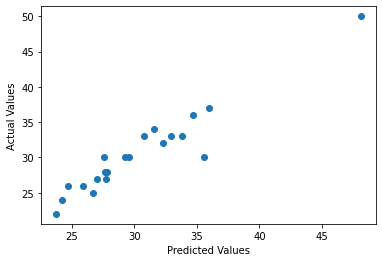

In [22]:
plt.scatter(x= guess, y= y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

Text(0, 0.5, 'Residual')

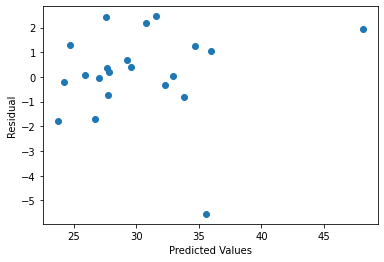

In [21]:
plt.scatter(x= guess, y= (y_test-guess))
plt.xlabel('Predicted Values')
plt.ylabel('Residual')

In [24]:
reg.score(X_test,y_test)

0.9100167739266988

Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....

In [25]:
c = reg.coef_
col = X.columns
print(reg.intercept_)
for i in range(len(col)):
    if c[i] != 0:
        print(c[i],col[i])

-2.2441875628629155
0.07738641327529916 Min.Price
-0.025818031677219203 Price
-0.026089724638259267 Max.Price
0.8319320036570766 MPG.city
-0.814364922456126 Cylinders
-0.08107304368358986 EngineSize
0.018337872069774386 Horsepower
0.00010395797626633341 RPM
-0.001078038200877457 Rev.per.mile
-0.04130645853261031 Fuel.tank.capacity
-0.5860746011412981 Passengers
0.03537044971652581 Length
0.13899595495703007 Wheelbase
0.11932548851749836 Width
-0.017030389944930863 Turn.circle
-0.15937637684289568 Rear.seat.room
0.4742846144793209 Luggage.room
-0.003654607899607809 Weight
0.2641131271550215 Audi
0.4501588674480289 BMW
-0.05459859014979376 Buick
0.6434874631331002 Cadillac
0.9940492329563239 Chevrolet
0.2870340020017279 Chrylser
-0.5288166644505273 Chrysler
-0.5011560834524423 Dodge
-0.44241126100201905 Eagle
-0.5012415366824836 Ford
0.2775431746223899 Geo
-0.18726685808992122 Honda
0.12278787813124135 Hyundai
8.40770955412573e-06 Infiniti
-0.20338423829220073 Lexus
-0.2463445434928892 L